-3065.343106095555

-2978.753314969444

-3887.2920298096296

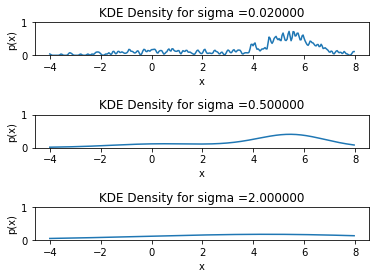

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from heapq import nsmallest
from matplotlib.pyplot import subplots_adjust 

subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=1.8)
sigma=[0.02,0.5,2.0]
data=np.loadtxt('nonParamTrain.txt')
test=np.loadtxt('nonParamTest.txt')
lT=len(test)
z=np.arange(min(data), max(data), 0.02) ## z has all the points where pdf is calculated
p=[] #probabilty density 
#p=(K/500)*
counter=311 #subplot
for k in sigma:
    elem=0 # count the number of elements in plot
    for i in z:  #traversing from starting to end with step size of 0.05
        temp=0
        denom= len(data)*k*((2*np.pi)**0.5)
        denexp=2*((k)**2)
        for j in range(0,len(data)-1):   
            numexp=(i-data[j])**2
            expo=np.exp(-numexp/denexp)
            temp=temp+expo/denom   
        p.append(temp)
    
    t = np.arange(-4, 8, 12/len(p))
    
    
    #print(counter)
    plt.subplot(counter)
    plt.plot(t,p)
    plt.ylim(0,1)
    plt.title('KDE Density for sigma =%f' %k)
    plt.ylabel('p(x)')
    plt.xlabel('x')
    counter=counter+1
    # p array has the pdf values but
    lH=0
    for c in range(0,len(test)-1):
        #lH=lH+np.log(p[nsmallest(1, z, key=lambda x: abs(x-test[c]))]) # gets the nearest elemnt from p
          index= nsmallest(1, z, key=lambda x: abs(x-test[c]))-min(data) # gets the nearest elemnt from p
          index=int(sum(index)/0.02)
          lH=lH+np.log(p[index])       
    display(lH)    
    p=[]  # resetting the array for next time
